<a href="https://colab.research.google.com/github/JavierPachas/nn_examples/blob/main/dl_keras_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Regression model in Keras**

In [1]:
import pandas as pd
import keras
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/JavierPachas/nn_examples/main/data/Advertising_2023.csv'

In [3]:
df = pd.read_csv(url, index_col = 0)

In [4]:
df.head()

,digital,TV,radio,newspaper,sales
1,345.15,156.0,37.8,69.2,22.1
2,66.75,46.0,39.3,45.1,10.4
3,25.80,18.3,45.9,69.3,9.3
4,227.25,145.1,41.3,58.5,18.5
5,271.20,165.2,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [6]:
df.shape

(1199, 5)

In [7]:
df.corr()

,digital,TV,radio,newspaper,sales
digital,1.000000,0.474256,0.041316,0.048023,0.380101
TV,0.474256,1.000000,0.055697,0.055579,0.781824
radio,0.041316,0.055697,1.000000,0.353096,0.576528
newspaper,0.048023,0.055579,0.353096,1.000000,0.227039
sales,0.380101,0.781824,0.576528,0.227039,1.000000


In [8]:
X = df[['digital','TV','radio','newspaper']]

In [9]:
y = df['sales']

In [10]:
normalized_feature = keras.utils.normalize(X.values)
print(normalized_feature)

[[0.89211961 0.4032179  0.0977028  0.17886333]
 [0.66254734 0.45658693 0.39008405 0.44765371]
 [0.29009225 0.20576311 0.51609436 0.77920128]
 ...
 [0.06744611 0.99272247 0.05163843 0.08536149]
 [0.19480049 0.91868871 0.08898294 0.33188231]
 [0.06744611 0.99272247 0.05163843 0.08536149]]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
#Modeling
model = Sequential()
model.add(Dense(4, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1))

In [13]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [14]:
#fitting model
sq_model = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 32)

Epoch 1/32
30/30 [==============================] - 1s 8ms/step - loss: 43990.7891 - mse: 43990.7891 - val_loss: 36252.7617 - val_mse: 36252.7617
Epoch 2/32
30/30 [==============================] - 0s 3ms/step - loss: 31997.4961 - mse: 31997.4961 - val_loss: 26924.5293 - val_mse: 26924.5293
Epoch 3/32
30/30 [==============================] - 0s 3ms/step - loss: 23882.2559 - mse: 23882.2559 - val_loss: 20584.2715 - val_mse: 20584.2715
Epoch 4/32
30/30 [==============================] - 0s 2ms/step - loss: 18386.3770 - mse: 18386.3770 - val_loss: 15994.7500 - val_mse: 15994.7500
Epoch 5/32
30/30 [==============================] - 0s 3ms/step - loss: 14435.7197 - mse: 14435.7197 - val_loss: 12721.4531 - val_mse: 12721.4531
Epoch 6/32
30/30 [==============================] - 0s 2ms/step - loss: 11566.6162 - mse: 11566.6162 - val_loss: 10289.7070 - val_mse: 10289.7070
Epoch 7/32
30/30 [==============================] - 0s 2ms/step - loss: 9394.6162 - mse: 9394.6162 - val_loss: 8495.1650 - v

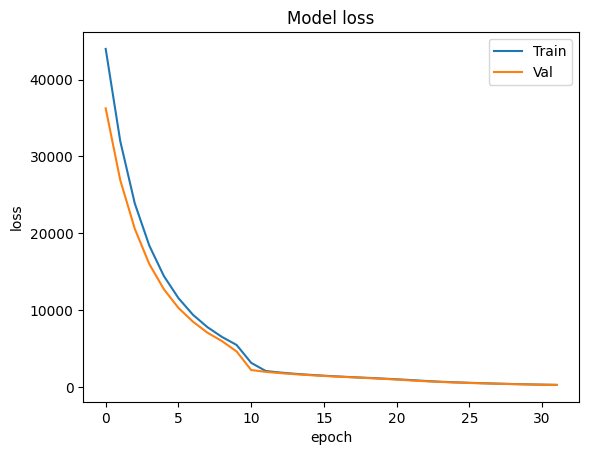

In [15]:
#evaluation
plt.plot(sq_model.history['loss'])
plt.plot(sq_model.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()